Load modules

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Hyper parameter

In [2]:
N_EPOCH = 10
NUM_WORD = 10000
BATCH_SIZE = 32
EMB_DIM = 16
LR = 1e-4

Load dataset

    IMDB dataset

In [3]:
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=NUM_WORD)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                       value=0,
                                                       padding='pre',
                                                       maxlen=32)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                      value=0,
                                                      padding='pre',
                                                      maxlen=32)



Preprocessing

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

model

In [5]:
class RNN(tf.keras.Model):
    def __init__(self, model_name = 'rnn', emb_dim = EMB_DIM,
                 num_word = NUM_WORD, out_dim = 32):
        super(RNN, self).__init__()
        
        #---- Argument ----#
        self.model_name = model_name
        self.emb_dim = EMB_DIM
        self.out_dim = out_dim
        self.num_word = num_word
        #---- Layers ----#
        self.emb = tf.keras.layers.Embedding(self.num_word, self.emb_dim)
        self.dense = tf.keras.layers.Dense(2, activation='softmax')
        #--- Model 종류 ---#
        if self.model_name in ['lstm', 'Lstm', 'LSTM']:
            self.rnn = layers.LSTM(self.out_dim)
        elif self.model_name in ['gru', 'Gru', 'GRU']:
            self.rnn= layers.GRU(self.out_dim)
        else:
            self.rnn = layers.LSTM(self.out_dim)
        
    def call(self, x, training=None, mask=None):
        x = self.emb(x)
        x = self.rnn(x)
        return self.dense(x)

In [6]:
rnn = RNN()
lstm = RNN('lstm')
gru = RNN('gru')

Compile

In [7]:
rnn.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])
lstm.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])
gru.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

Training

In [8]:
rnn_history = rnn.fit(train_ds,
                        batch_size = BATCH_SIZE,
                        epochs = N_EPOCH,
                        verbose = 1,
                        validation_data = test_ds,
                        shuffle=True)

lstm_history = lstm.fit(train_ds,
                        batch_size = BATCH_SIZE,
                        epochs = N_EPOCH,
                        verbose = 1,
                        validation_data = test_ds,
                        shuffle=True)

gru_history = gru.fit(train_ds,
                        batch_size = BATCH_SIZE,
                        epochs = N_EPOCH,
                        verbose = 1,
                        validation_data = test_ds,
                        shuffle=True)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6523 - accuracy: 0.6146 - val_loss: 0.5773 - val_accuracy: 0.7003
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5133 - accuracy: 0.7492 - val_loss: 0.5030 - val_accuracy: 0.7542
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4326 - accuracy: 0.8030 - val_loss: 0.4850 - val_accuracy: 0.7658
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3871 - accuracy: 0.8291 - val_loss: 0.4768 - val_accuracy: 0.7718
Epoch 5/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3551 - accuracy: 0.8470 - val_loss: 0.4771 - val_accuracy: 0.7718
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3313 - accuracy: 0.8603 - val_loss: 0.4962 - val_accuracy: 0.7683
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3116 - accuracy: 0.8730 - val_loss: 0.5133 - val_accuracy: 0.7659

Visualize

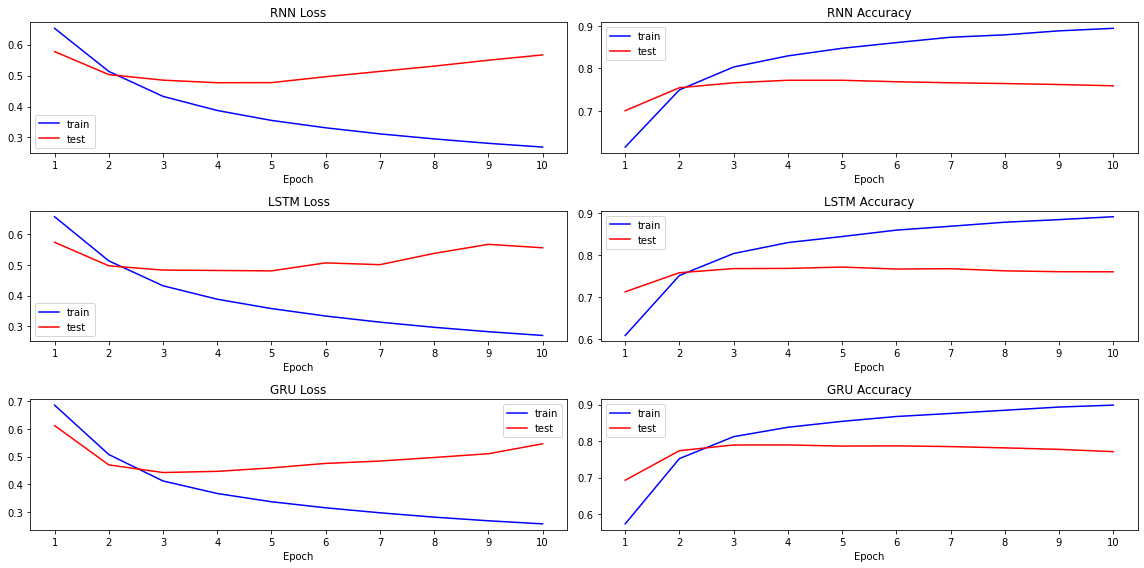

In [16]:
fig, ax = plt.subplots(3, 2, figsize = (16, 8))

ax[0, 0].plot([None]+rnn_history.history['loss'], c = 'b', label = 'train')
ax[0, 0].plot([None]+rnn_history.history['val_loss'], c = 'r', label = 'test')
ax[1, 0].plot([None]+lstm_history.history['loss'], c = 'b', label = 'train')
ax[1, 0].plot([None]+lstm_history.history['val_loss'], c = 'r', label = 'test')
ax[2, 0].plot([None]+gru_history.history['loss'], c = 'b', label = 'train')
ax[2, 0].plot([None]+gru_history.history['val_loss'], c = 'r', label = 'test')

ax[0, 1].plot([None]+rnn_history.history['accuracy'], c = 'b', label = 'train')
ax[0, 1].plot([None]+rnn_history.history['val_accuracy'], c = 'r', label = 'test')
ax[1, 1].plot([None]+lstm_history.history['accuracy'], c = 'b', label = 'train')
ax[1, 1].plot([None]+lstm_history.history['val_accuracy'], c = 'r', label = 'test')
ax[2, 1].plot([None]+gru_history.history['accuracy'], c = 'b', label = 'train')
ax[2, 1].plot([None]+gru_history.history['val_accuracy'], c = 'r', label = 'test')

ax[0, 0].set_title('RNN Loss')
ax[1, 0].set_title('LSTM Loss')
ax[2, 0].set_title('GRU Loss')
ax[0, 1].set_title('RNN Accuracy')
ax[1, 1].set_title('LSTM Accuracy')
ax[2, 1].set_title('GRU Accuracy')

ax[0, 0].set_xlabel('Epoch')
ax[1, 0].set_xlabel('Epoch')
ax[2, 0].set_xlabel('Epoch')
ax[0, 1].set_xlabel('Epoch')
ax[1, 1].set_xlabel('Epoch')
ax[2, 1].set_xlabel('Epoch')


ax[0, 0].set_xticks(range(1, N_EPOCH+1))
ax[1, 0].set_xticks(range(1, N_EPOCH+1))
ax[2, 0].set_xticks(range(1, N_EPOCH+1))
ax[0, 1].set_xticks(range(1, N_EPOCH+1))
ax[1, 1].set_xticks(range(1, N_EPOCH+1))
ax[2, 1].set_xticks(range(1, N_EPOCH+1))

ax[0, 0].legend(loc = 'best')
ax[1, 0].legend(loc = 'best')
ax[2, 0].legend(loc = 'best')
ax[0, 1].legend(loc = 'best')
ax[1, 1].legend(loc = 'best')
ax[2, 1].legend(loc = 'best')

plt.tight_layout()
plt.show()

Sample

In [11]:
sample_data, sample_label = next(iter(test_ds))
rnn_pred = rnn(sample_data).numpy()
lstm_pred = lstm(sample_data).numpy()
gru_pred = gru(sample_data).numpy()
rnn_pred = np.argmax(rnn_pred, axis = 1)
lstm_pred = np.argmax(lstm_pred, axis = 1)
gru_pred = np.argmax(gru_pred, axis = 1)

df = {'Ground Truth' : sample_label,
        'RNN Prediction' : rnn_pred,
        'LSTM Prediction' : lstm_pred,
        'Gru Prediction' : gru_pred}

df = pd.DataFrame(df)
df.head()

,Ground Truth,RNN Prediction,LSTM Prediction,Gru Prediction
0,0,1,1,0
1,1,1,1,1
2,1,1,1,1
3,0,1,1,0
4,1,1,1,1
